# CNN Classifier for FashionMNIST

Ref: https://www.kaggle.com/code/pankajj/fashion-mnist-with-pytorch-93-accuracy/notebook

Changed model architecture and training script

### Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix

torch.manual_seed(0)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### Load FashionMNIST data

In [ ]:
train_set = torchvision.datasets.FashionMNIST("./data", download=True, transform=
                                                transforms.Compose([transforms.ToTensor()]))
test_set = torchvision.datasets.FashionMNIST("./data", download=True, train=False, transform=
                                               transforms.Compose([transforms.ToTensor()])) 

In [ ]:
batch_size = 128

In [ ]:
train_loader = torch.utils.data.DataLoader(train_set, 
                                           batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_set,
                                          batch_size=batch_size)

In [ ]:
def output_label(label):
    output_mapping = {
                 0: "T-shirt/Top",
                 1: "Trouser",
                 2: "Pullover",
                 3: "Dress",
                 4: "Coat", 
                 5: "Sandal", 
                 6: "Shirt",
                 7: "Sneaker",
                 8: "Bag",
                 9: "Ankle Boot"
                 }
    input = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[input]

### Model Architecture

In [ ]:
class FashionCNN(nn.Module):
    
    def __init__(self):
        super(FashionCNN, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding="same"),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding="same"),
            nn.MaxPool2d(2)
        )
        
        self.fc1 = nn.Linear(in_features=64*7*7, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = nn.ReLU()(self.fc1(out))
        out = nn.Softmax()(self.fc2(out))
        
        return out

In [ ]:
model = FashionCNN()
model.to(device)

error = nn.CrossEntropyLoss()

learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
!pip install torchsummary

from torchsummary import summary
summary(model, (1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
            Conv2d-3           [-1, 64, 14, 14]          18,496
         MaxPool2d-4             [-1, 64, 7, 7]               0
            Linear-5                  [-1, 128]         401,536
            Linear-6                   [-1, 10]           1,290
Total params: 421,642
Trainable params: 421,642
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.36
Params size (MB): 1.61
Estimated Total Size (MB): 1.97
----------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


### Train CNN Classifier

In [ ]:
num_epochs = 100
# Lists for visualization of loss and accuracy 
loss_list = []

# Lists for knowing classwise accuracy
predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    loss_val = 0
    for images, labels in train_loader:
        # Transfering images and labels to GPU if available
        images, labels = images.to(device), labels.to(device)
        
        # Forward pass 
        outputs = model(images)
        loss = error(outputs, labels)
        loss_val+=loss.item()
        
        # Initializing a gradient as 0 so there is no mixing of gradient among the batches
        optimizer.zero_grad()
        
        #Propagating the error backward
        loss.backward()
        
        # Optimizing the parameters
        optimizer.step()
    
    loss_list.append(loss_val)
    print("Epoch: {}, Loss: {} %".format(epoch, loss_val))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 0, Loss: 785.7340055704117 %
Epoch: 1, Loss: 751.6245855093002 %
Epoch: 2, Loss: 743.9825576543808 %
Epoch: 3, Loss: 739.1557669639587 %
Epoch: 4, Loss: 735.3152719736099 %
Epoch: 5, Loss: 732.7057023048401 %
Epoch: 6, Loss: 731.1125799417496 %
Epoch: 7, Loss: 728.6171298027039 %
Epoch: 8, Loss: 725.5252788066864 %
Epoch: 9, Loss: 723.8625601530075 %
Epoch: 10, Loss: 722.0530272722244 %
Epoch: 11, Loss: 720.7332025766373 %
Epoch: 12, Loss: 719.4616811275482 %
Epoch: 13, Loss: 717.969154715538 %
Epoch: 14, Loss: 717.123051404953 %
Epoch: 15, Loss: 716.7387900352478 %
Epoch: 16, Loss: 715.359743475914 %
Epoch: 17, Loss: 714.6414570808411 %
Epoch: 18, Loss: 713.7182596921921 %
Epoch: 19, Loss: 712.8496819734573 %
Epoch: 20, Loss: 712.4650930166245 %
Epoch: 21, Loss: 710.681394815445 %
Epoch: 22, Loss: 709.9500198364258 %
Epoch: 23, Loss: 710.2802909612656 %
Epoch: 24, Loss: 709.2224099636078 %
Epoch: 25, Loss: 708.9546780586243 %
Epoch: 26, Loss: 708.4299163818359 %
Epoch: 27, Loss

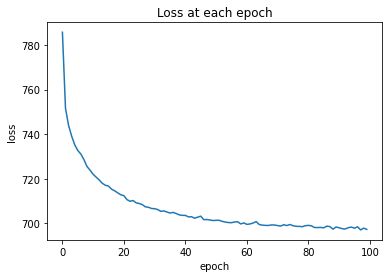

In [ ]:
plt.plot(np.arange(len(loss_list)), loss_list)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Loss at each epoch")
plt.show()

### Evaluate performance

In [ ]:
class_correct = [0. for _ in range(10)]
total_correct = [0. for _ in range(10)]

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        predicted = torch.max(outputs, 1)[1]
        c = (predicted == labels).squeeze()
        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i].item()
            total_correct[label] += 1
        
for i in range(10):
    print("Accuracy of {}: {:.2f}%".format(output_label(i), class_correct[i] * 100 / total_correct[i]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Accuracy of T-shirt/Top: 87.90%
Accuracy of Trouser: 97.90%
Accuracy of Pullover: 80.00%
Accuracy of Dress: 91.50%
Accuracy of Coat: 88.80%
Accuracy of Sandal: 96.90%
Accuracy of Shirt: 76.00%
Accuracy of Sneaker: 97.80%
Accuracy of Bag: 97.70%
Accuracy of Ankle Boot: 96.70%


In [ ]:
print("Accuracy : {:.2f}%".format(np.sum(class_correct) * 100 / np.sum(total_correct)))

Accuracy : 91.12%


### Save model

In [ ]:
checkpoint = {
    "state_dict": model.state_dict(),
}
torch.save(checkpoint, "/content/drive/MyDrive/Colab Notebooks/DiffusionModels/fashion_mnist_CNNClassifier_91Acc.pt")

In [ ]:
# Sanity check
checkpoint = torch.load("/content/drive/MyDrive/Colab Notebooks/DiffusionModels/fashion_mnist_CNNClassifier_91Acc.pt")
model2 = FashionCNN()
model2.to(device)
model2.load_state_dict(checkpoint['state_dict'])

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        predicted = torch.max(outputs, 1)[1]
        c = (predicted == labels).squeeze()
        print(predicted, labels, c)
        break

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 5,
        1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 6, 7, 6, 7, 2, 1,
        2, 6, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1, 2, 4, 7, 8, 7, 0,
        2, 6, 4, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 2, 5, 3, 6, 7, 1, 8,
        0, 1, 4, 2, 3, 6, 7, 6, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8,
        0, 0, 7, 9, 3, 0, 8, 4], device='cuda:0') tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 9,
        1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7, 6, 7, 2, 1,
        2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1, 2, 3, 9, 8, 7, 0,
        2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 6, 5, 3, 6, 7, 1, 8,
        0, 1, 4, 2, 3, 6, 7, 2, 7, 8, 5, 9, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 4], device='cuda:0') tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
